### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv('coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [14]:
# data.count() --> result is 12,685 rows
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [17]:
# Since a majority (12,576/12,685=99.1%) did not specify a car in their survey,  I will drop the data.
# I could just ignore the car column rather than drop it. 
df = data
data.drop('car', axis=1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [20]:
# Y - 7,210 / 12,684 = 56.8%
# N - 5474 / 12,684 = 43.2% 
data["Y"].value_counts(normalize = True)


Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

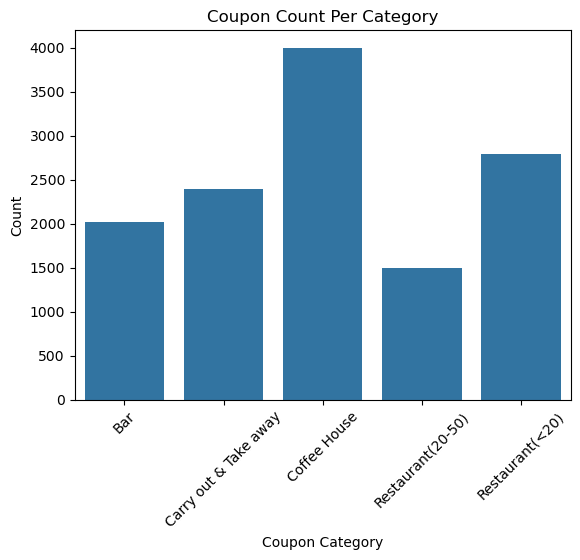

In [23]:

# get the count of each coupon category
coupon_count_per_category = data['coupon'].value_counts().sort_index()

# plot the data
sns.barplot(x=coupon_count_per_category.index, y=coupon_count_per_category.values)

# add labels
plt.title('Coupon Count Per Category')
plt.xlabel('Coupon Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)


6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

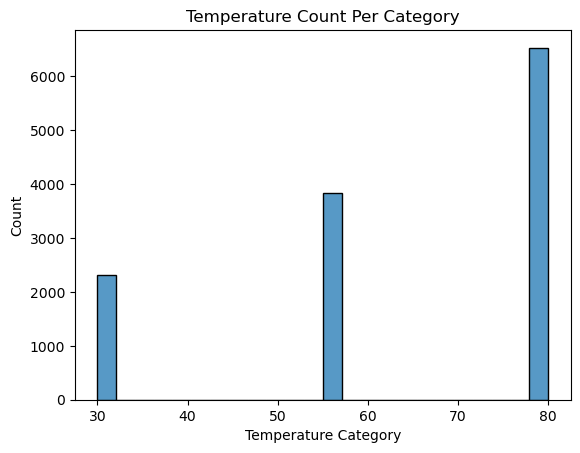

In [26]:
# temp is grouped into 30, 55, and 80
sns.histplot(data['temperature'])

# add labels
plt.title('Temperature Count Per Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
# print((data['coupon'] == 'Bar').sum()) --> 2017 have the bar coupon
df_bar_coupon = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?
df_bar_coupon_accepted = df_bar_coupon[df_bar_coupon['Y'] == 1]

In [32]:
 df_bar_coupon_accepted = df_bar_coupon[df_bar_coupon['Y'] == 1]
# trying a new way to get the total (827), I struggle with when to use sum or value_counts
print(len(df_bar_coupon_accepted)) 

827


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
# get totals of each category and accepted
df_bar_coupon_accepted.groupby('Bar')['Bar'].value_counts()

Bar
1~3      257
4~8      117
gt8       36
less1    253
never    156
Name: count, dtype: int64

In [37]:
# total for those who went to a bar 3 or fewer times a month --> 666
df_three_or_fewer = df_bar_coupon_accepted[df_bar_coupon_accepted['Bar'].isin(['1~3','less1', 'never'])]
len(df_three_or_fewer['Bar'])

666

In [39]:
# total for those who went to a bar more than three times a month (not counting 3) --> 153
df_more = df_bar_coupon_accepted[df_bar_coupon_accepted['Bar'].isin(['4~8','gt8'])]
len(df_more['Bar'])

153

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [42]:
# total for those who go to a bar more than once a month --> 293
df_more_than_once = df_bar_coupon_accepted[df_bar_coupon_accepted['Bar'].isin(['1~3','4-8', 'gt8'])]
print(len(df_more_than_once))


293


In [44]:
df_more_than_once.groupby('age')['age'].value_counts()

age
21         81
26         84
31         49
36         14
41         18
46          6
50plus     37
below21     4
Name: count, dtype: int64

In [46]:
df_more_than_once_under_twenty_five = df_more_than_once[df_more_than_once['age'].isin(['21','below21'])]
print(len(df_more_than_once_under_twenty_five))

85


In [48]:
# the numbers are close from 293 to 208
df_more_than_once_over_twenty_five = df_more_than_once[df_more_than_once['age'].isin(['26','31','36','41','46', '50plus'])]
print(len(df_more_than_once_over_twenty_five))

208


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [51]:
df_more_than_once.groupby('passanger')['passanger'].value_counts()

passanger
Alone        170
Friend(s)     76
Kid(s)        13
Partner       34
Name: count, dtype: int64

In [53]:
# assume that a had at least one passenger, not alone.
df_more_than_once_not_with_kid = df_more_than_once[df_more_than_once['passanger'].isin(['Friend(s)','Partner'])]
print(len(df_more_than_once_not_with_kid))

110


In [55]:
df_more_than_once_not_with_kid.groupby('occupation')['occupation'].value_counts()


occupation
Architecture & Engineering                    3
Arts Design Entertainment Sports & Media      8
Building & Grounds Cleaning & Maintenance     1
Business & Financial                          5
Computer & Mathematical                       8
Construction & Extraction                     3
Education&Training&Library                    3
Food Preparation & Serving Related            4
Healthcare Practitioners & Technical          4
Healthcare Support                            2
Installation Maintenance & Repair             1
Legal                                         3
Management                                    7
Office & Administrative Support               7
Personal Care & Service                       1
Production Occupations                        2
Protective Service                            4
Sales & Related                              11
Student                                      12
Transportation & Material Moving              3
Unemployed                   

In [57]:
df_more_than_once_not_with_kid.groupby('occupation')['occupation'].value_counts().sum()

110

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [60]:
df_more_than_once_not_with_kid.groupby('maritalStatus')['maritalStatus'].value_counts()

maritalStatus
Divorced              2
Married partner      33
Single               45
Unmarried partner    30
Name: count, dtype: int64

In [62]:
data.groupby('maritalStatus')['maritalStatus'].value_counts()

maritalStatus
Divorced              516
Married partner      5100
Single               4752
Unmarried partner    2186
Widowed               130
Name: count, dtype: int64

In [64]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed --> 110
print("110")

110


In [66]:
df_more_than_once.groupby('age')['age'].value_counts()

age
21         81
26         84
31         49
36         14
41         18
46          6
50plus     37
below21     4
Name: count, dtype: int64

In [68]:
# go to bars more than once a month and are under the age of 30 --> 169
df_more_than_once_under_thirty = df_more_than_once[df_more_than_once['age'].isin(['21','26', 'below21'])]
print(len(df_more_than_once_under_thirty))

169


In [70]:
# go to cheap restaurants more than 4 times a month and income is less than 50K.
data_accept = data[data['Y'] == 1]

In [72]:
df2 = data_accept[data_accept['RestaurantLessThan20'].isin(['4~8','gt8'])]
len(df2)

2874

In [74]:
df3 = df2[df2['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999'])]
len(df3)

1081

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [79]:
df1 = data
df1 = data[data['Y'] == 1]

df1.groupby('age')['age'].value_counts()



age
21         1587
26         1525
31         1114
36          706
41          626
46          395
50plus      910
below21     347
Name: count, dtype: int64

In [81]:
df2 = df1[df1['age'].isin(['21','26','31'])]
print(f"Age group 21-31 who accepted a coupon: {len(df2)}")

Age group 21-31 who accepted a coupon: 4226


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '21'),
  Text(1, 0, '26'),
  Text(2, 0, '31'),
  Text(3, 0, '36'),
  Text(4, 0, '41'),
  Text(5, 0, '46'),
  Text(6, 0, '50plus'),
  Text(7, 0, 'below21')])

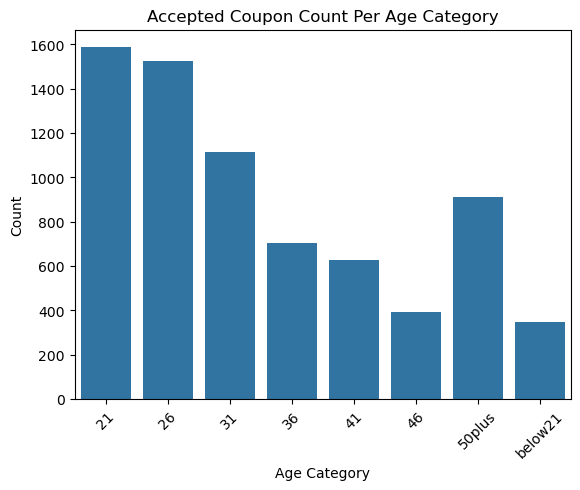

In [84]:
# ages 21-31 represent 4226 of those that acccepted a coupon. 

coupon_count_per_category = df1['age'].value_counts().sort_index()

# plot the data
sns.barplot(x=coupon_count_per_category.index, y=coupon_count_per_category.values)

# add labels
plt.title('Accepted Coupon Count Per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)


In [86]:
df1.groupby('occupation')['occupation'].value_counts()

occupation
Architecture & Engineering                    111
Arts Design Entertainment Sports & Media      326
Building & Grounds Cleaning & Maintenance      26
Business & Financial                          310
Community & Social Services                   118
Computer & Mathematical                       798
Construction & Extraction                     106
Education&Training&Library                    494
Farming Fishing & Forestry                     23
Food Preparation & Serving Related            174
Healthcare Practitioners & Technical          165
Healthcare Support                            169
Installation Maintenance & Repair              71
Legal                                         103
Life Physical Social Science                   98
Management                                    493
Office & Administrative Support               384
Personal Care & Service                        96
Production Occupations                         68
Protective Service                     

In [88]:
# Individuals who accepted the coupon and represented the largest two values of occupation of not working or a student. 
print("1,992")

1,992


In [90]:
# all who offered coupon
df0 = data.groupby('income')['income'].value_counts()

In [92]:
# said yes to coupon
df1.groupby('income')['income'].value_counts()

income
$100000 or More     1004
$12500 - $24999     1052
$25000 - $37499     1194
$37500 - $49999     1018
$50000 - $62499      988
$62500 - $74999      446
$75000 - $87499      414
$87500 - $99999      476
Less than $12500     618
Name: count, dtype: int64

In [94]:
# no to coupon
df3 = data[data['Y'] == 0]
df3.groupby('income')['income'].value_counts()

income
$100000 or More     732
$12500 - $24999     779
$25000 - $37499     819
$37500 - $49999     787
$50000 - $62499     671
$62500 - $74999     400
$75000 - $87499     443
$87500 - $99999     419
Less than $12500    424
Name: count, dtype: int64